In [1]:
# I will code the example for comparing root masses, which will give you some idea how to do the homework

In [35]:
# load pacakges
import skimage.io
import numpy as np
import matplotlib.pyplot as plt
import skimage.transform
import skimage.color
import skimage.filters

In [31]:
# Read the image. The image '07-four-maize-roots.jpg' has four images, you need to slice each of the image out
four_maize = skimage.io.imread('img_processing_data/07-four-maize-roots.jpg')

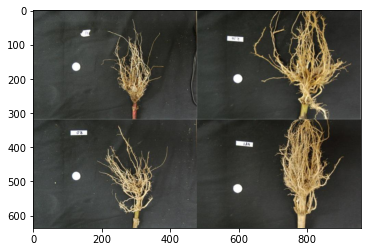

In [5]:
plt.imshow(four_maize)

In [6]:
# get the two dimensions
dim_1 = four_maize.shape[0]
dim_2 = four_maize.shape[1]

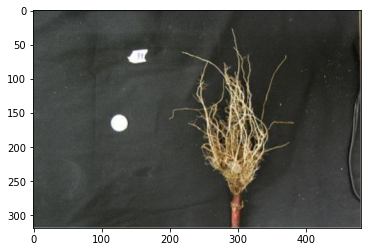

In [32]:
# select upper-left corner image
maize_1 = four_maize[0:int(dim_1/2+1), 0:int(dim_2/2)+1,:]
plt.imshow(maize_1)

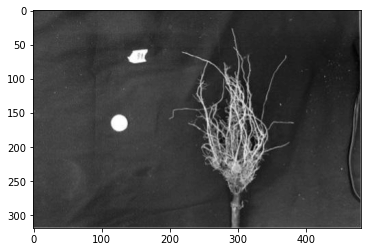

In [33]:
# convert to gray scale image
maize_1 = skimage.color.rgb2gray(maize_1)
plt.imshow(maize_1,cmap='gray')

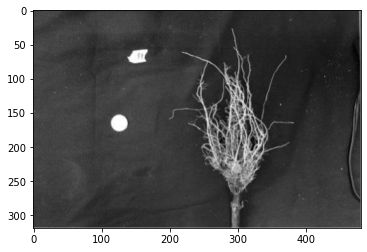

In [37]:
# blur the image, sigma = 0.2
maize_1 = skimage.filters.gaussian(maize_1, sigma=0.2)
plt.imshow(maize_1, cmap='gray')

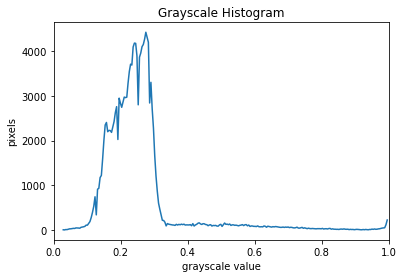

In [38]:
plt.figure()
plt.title("Grayscale Histogram")
plt.xlabel("grayscale value")
plt.ylabel("pixels")
plt.xlim([0.0, 1.0])  # <- named arguments do not work here
histogram, bin_edges = np.histogram(maize_1, bins=256) # returns histogram (minus bin egdes) and bin edges
plt.plot(bin_edges[0:-1], histogram)  # <- or here
plt.show()

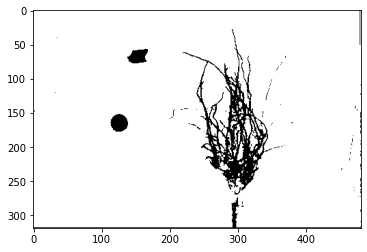

In [52]:
# we want bright pixels
# select a threshold of 0.5. You can try a few different threshold, until most of the maize root was captured
mask = maize_1 < 0.45
# you can directly use the mask image to compute the root mass. 
# We will get a ratio of the number of pixels occupied by the root to the total number of pixels in the picture.
# by comparing this ratio among the four pictures, you will know, approximately, which root has the most mass.
# Notice, in a better experiment design, you should have an object (such as a coin) sit beside the four roots to help us caliberate the image.
# we have something similar in the picture (the two white markers), but we do not perform this step in this program
plt.imshow(mask, cmap='gray')

In [53]:
# determine root mass ratio
w = mask.shape[1]
h = mask.shape[0]
rootPixels = w * h - np.count_nonzero(mask) # pixels that are False
density_1 = rootPixels / (w * h)
print('Root in the upper-left image: ', density_1)

Root in the upper-left image:  0.0556230407523511


In [ ]:
# the example in the lesson used adaptive thresholding: https://datacarpentry.org/image-processing/07-thresholding/index.html
# you are welcome to try that too. 
# complete the analysis of the other three images on your own, if you are intersted. What I want to show and remind you are:
# this method has two flaws: (1) we have extra features that we count as rootPixels but not root (two objects on the left)
# (2) not caliberated against a standard object. However, you can fixed the two flaws by using the round object on the left as a standard.